# Email spam detection:

Dataset from kaggle: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

   We will do: 1) Data Cleaning 
            2) EDA 
            3) Ploting Graph 
            4) Text Pre-Processing 
            5) Model Building 
            6) Evaluation/Prediction 
            7) Building a Predictive System 

# Importing dependencies

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data Collecting and Pre-Processing

In [3]:
df= pd.read_csv('mail_data.csv')

In [4]:
#loading 5 rows of dataset
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#May include null values and duplicate values
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Label Encoding

In [7]:
#Converting: Spam = 1 & Ham = 0

In [8]:
df.loc[df['Category'] == 'spam', 'Category',] = 1
df.loc[df['Category'] == 'ham', 'Category',] = 0

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 1) Data Cleaning

In [10]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.duplicated().sum()

415

In [12]:
#There are 415 duplicate values
df= df.drop_duplicates(keep = 'first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5157, 2)

In [15]:
#After removing the Duplicates, the dataset contains 5157 rows

# 2) EDA- Exploratory Data Analysis

In [16]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

In [17]:
#Ham = 4516 values and spam = 614 values

# 3) Ploting: 
A pie chart to see the distribution 

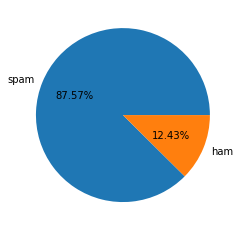

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels= ['spam','ham'],autopct= "%0.2f%%")
plt.show()

In [19]:
#Spam is 87% and Ham is 12%

# Data is imbalanced

In [51]:
#Creating an extra column as the total number of characters in the sentence

In [19]:
df['num_characters']= df['Message'].apply(len)

In [20]:
df.head(5)

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
x= df['Message']
y= df['Category']

In [22]:
#x is for all the Message
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [23]:
#y is for the Category
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: object

# Splitting the data into traing data and test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 3)

In [26]:
x.shape

(5157,)

In [ ]:
#x.shape contains 5157 rows and 2nd value is empty as there is only one column(x contains only 1 column= Message)

In [27]:
#80% of data
x_train.shape

(4125,)

In [28]:
#20% of the data
x_test.shape

(1032,)

# 4) Text/Data Pre-Processing:
* Lower case
* Removing stop words
* Changing data type

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#Transform the text data to feature vectors that can be used as input to the model
feature_extraction= TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= 'True')

In [32]:
x_train_features= feature_extraction.fit_transform(x_train)
x_test_features= feature_extraction.transform(x_test)

In [33]:
#Changing the data type into integer
y_train= y_train.astype('int')
y_test= y_test.astype('int')

In [34]:
print(x_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

# 5) Model Building

In [ ]:
#Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model= LogisticRegression()

In [37]:
#Training the Logistic Regression model
model.fit(x_train_features, y_train)

LogisticRegression()

# 6) Evaluation/Prediction

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
prediction_on_training_data= model.predict(x_train_features)
accuracy_on_training_data= accuracy_score(y_train, prediction_on_training_data)

In [41]:
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.961939393939394


In [42]:
prediction_on_test_data= model.predict(x_test_features)
accuracy_on_test_data= accuracy_score(y_train, prediction_on_training_data)

In [43]:
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.961939393939394


# 7) Building a Predictive System

In [44]:
input_mail= ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

input_data_features= feature_extraction.transform(input_mail)

prediction= model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
    print('spam mail')
    
else:
        print('ham mail')

[1]
spam mail
